In [9]:
import fitz  # PyMuPDF
import nltk
import os
from nltk.tokenize import word_tokenize

# Make sure to download the NLTK tokenizer
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

def extract_text_and_count_tokens(pdf_path):
    # Open the PDF file
    document = fitz.open(pdf_path)
    
    # Extract text from the first 10 pages
    text = ""
    for page_num in range(min(10, len(document))):
        page = document.load_page(page_num)
        text += page.get_text()
    
    # Split the text into words
    words = text.split()
    
    # Get the number of words
    num_words = len(words)
    
    return num_words

def get_all_pdf_paths(folder_path):
    pdf_paths = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith('.pdf'):
                pdf_paths.append(os.path.join(root, file))
    return pdf_paths

def process_all_pdfs_in_folder(folder_path):
    pdf_paths = get_all_pdf_paths(folder_path)
    c=0 
    sum =0
    for pdf_path in pdf_paths:
        print(pdf_path)
        num_tokens = extract_text_and_count_tokens(pdf_path)
        print(f"Number of tokens in the first 10 pages of '{pdf_path}': {num_tokens}")
        c+=1
        sum += num_tokens
    print(sum/c)
# Example usage
folder_path = '/Users/yiminglin/Documents/Codebase/Pdf_reverse/data/raw/benchmark1'  # Replace with your folder path
process_all_pdfs_in_folder(folder_path)


/Users/yiminglin/Documents/Codebase/Pdf_reverse/data/raw/benchmark1/id_18_28_45_48_51_57_60_70_72_79_81_89_91_92_94_95_97_99_102_105_113_117_118_119_122_125_131_132_137_139_150_v2.pdf
Number of tokens in the first 10 pages of '/Users/yiminglin/Documents/Codebase/Pdf_reverse/data/raw/benchmark1/id_18_28_45_48_51_57_60_70_72_79_81_89_91_92_94_95_97_99_102_105_113_117_118_119_122_125_131_132_137_139_150_v2.pdf': 2880
/Users/yiminglin/Documents/Codebase/Pdf_reverse/data/raw/benchmark1/id_157.pdf
Number of tokens in the first 10 pages of '/Users/yiminglin/Documents/Codebase/Pdf_reverse/data/raw/benchmark1/id_157.pdf': 2009
/Users/yiminglin/Documents/Codebase/Pdf_reverse/data/raw/benchmark1/id_143.pdf
Number of tokens in the first 10 pages of '/Users/yiminglin/Documents/Codebase/Pdf_reverse/data/raw/benchmark1/id_143.pdf': 506
/Users/yiminglin/Documents/Codebase/Pdf_reverse/data/raw/benchmark1/id_18_28_45_48_51_57_60_70_72_79_81_89_91_92_94_95_97_99_102_105_113_117_118_119_122_125_131_132_13

In [ ]:
# Example usage


/Users/yiminglin/Documents/Codebase/Pdf_reverse/data/raw/certification/VT/Invisible Institue Report.pdf


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/yiminglin/nltk_data'
    - '/opt/homebrew/Caskroom/miniforge/base/nltk_data'
    - '/opt/homebrew/Caskroom/miniforge/base/share/nltk_data'
    - '/opt/homebrew/Caskroom/miniforge/base/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [2]:
from gurobipy import Model, GRB

# Create a new model
model = Model("ILP_Example")

# Decision variables
x1 = model.addVar(vtype=GRB.INTEGER, name="x1")  # Product A
x2 = model.addVar(vtype=GRB.INTEGER, name="x2")  # Product B

# Set the objective function
model.setObjective(3 * x1 + 5 * x2, GRB.MAXIMIZE)

# Add constraints
model.addConstr(x1 + 2 * x2 <= 6, "MachineHours")
model.addConstr(2 * x1 + x2 <= 8, "LaborHours")
model.addConstr(x1 >= 0, "NonNegativity_x1")
model.addConstr(x2 >= 0, "NonNegativity_x2")

# Optimize the model
model.optimize()

# Display the results
if model.status == GRB.OPTIMAL:
    print(f"Optimal solution found!")
    print(f"Produce {x1.x} units of Product A")
    print(f"Produce {x2.x} units of Product B")
    print(f"Maximum Profit: {model.objVal}")
else:
    print("No optimal solution found.")


Restricted license - for non-production use only - expires 2026-11-23
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 23.2.0 23C71)

CPU model: Apple M1 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 4 rows, 2 columns and 6 nonzeros
Model fingerprint: 0x3a18daf9
Variable types: 0 continuous, 2 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [3e+00, 5e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e+00, 8e+00]
Found heuristic solution: objective 12.0000000
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 2 rows, 2 columns, 4 nonzeros
Variable types: 0 continuous, 2 integer (0 binary)

Root relaxation: objective 1.650000e+01, 1 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0  

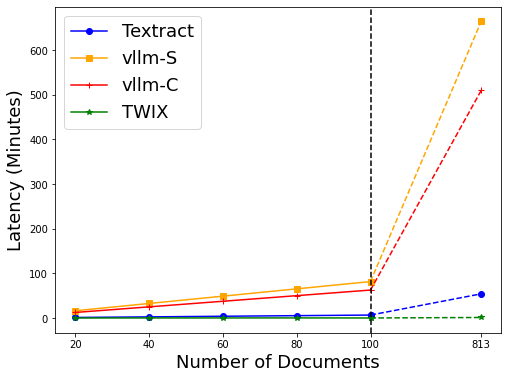

In [1]:
import matplotlib.pyplot as plt


# Define the data points
x = [20, 40, 60, 80, 100, 813]
aws = [78, 158, 241, 322, 401, 3252]
aws = [x / 60 for x in aws]
vllmS = [20*49,40*49,60*49,80*49,100*49,813*49]
vllmS = [x / 60 for x in vllmS]
vllmC = [20*37.6,40*37.6,60*37.6,80*37.6,100*37.6,813*37.6]
vllmC = [x / 60 for x in vllmC]
nc = 0.08
RT = [9.7+20*nc,9.7+40*nc,9.8+60*nc,9.8+100*nc,10,10.3+813*nc]
RT = [x / 60 for x in RT]

# Adjust the transformation to compress the 100-1000 section further
x_transformed = [20, 40, 60, 80, 100, 130]  # Compress 100-1000 range further

# Update the existing plot
plt.figure(figsize=(8, 6))

# Plot the main line and separate dashed section
plt.plot(x_transformed[:5], aws[:5], marker='o', color='blue', label='Textract')
plt.plot(x_transformed[4:], aws[4:], marker='o', linestyle='--', color='blue')

plt.plot(x_transformed[:5], vllmS[:5], marker='s', color='orange', label='vllm-S')
plt.plot(x_transformed[4:], vllmS[4:], marker='s', linestyle='--', color='orange')

plt.plot(x_transformed[:5], vllmC[:5], marker='+', color='red', label='vllm-C')
plt.plot(x_transformed[4:], vllmC[4:], marker='+', linestyle='--', color='red')

plt.plot(x_transformed[:5], RT[:5], marker='*', color='green', label='TWIX')
plt.plot(x_transformed[4:], RT[4:], marker='*', linestyle='--', color='green')


# Add a vertical dashed line at x=100 (transformed)
plt.axvline(x=100, linestyle='--', color='black')

# Customize x-axis ticks to reflect the original scale
plt.xticks(x_transformed, x)
plt.xlabel('Number of Documents',fontsize=18)
plt.ylabel('Latency (Minutes)',fontsize=18)
#plt.title('Custom X-Scale Plot with Enhanced Scaling')
#plt.grid(alpha=0.5)

plt.legend(fontsize=18)

# Show the updated plot
#plt.show()
plt.savefig('/Users/yiminglin/Documents/research/Pdf_reverse/pics/latency_scale.pdf', format='pdf',bbox_inches='tight', dpi=300)


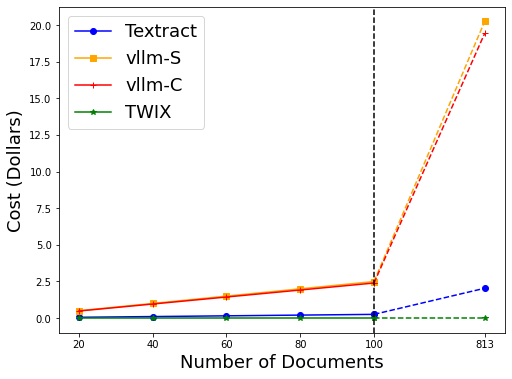

In [2]:
import matplotlib.pyplot as plt


# Define the data points
x = [20, 40, 60, 80, 100, 813]
aws = [20*0.0025,40*0.0025,60*0.0025,80*0.0025,100*0.0025,813*0.0025]
#aws = [x / 60 for x in aws]
uc = 0.0249
vllmS = [20*uc,40*uc,60*uc,80*uc,100*uc,813*uc]
uc = 0.0239
vllmC = [20*uc,40*uc,60*uc,80*uc,100*uc,813*uc]
#vllmC = [x / 60 for x in vllmC]
RT = [0.0036,0.0036,0.0036,0.0036,0.0036,0.0036]
#RT = [x / 60 for x in RT]

# Adjust the transformation to compress the 100-1000 section further
x_transformed = [20, 40, 60, 80, 100, 130]  # Compress 100-1000 range further

# Update the existing plot
plt.figure(figsize=(8, 6))

# Plot the main line and separate dashed section
plt.plot(x_transformed[:5], aws[:5], marker='o', color='blue', label='Textract')
plt.plot(x_transformed[4:], aws[4:], marker='o', linestyle='--', color='blue')

plt.plot(x_transformed[:5], vllmS[:5], marker='s', color='orange', label='vllm-S')
plt.plot(x_transformed[4:], vllmS[4:], marker='s', linestyle='--', color='orange')

plt.plot(x_transformed[:5], vllmC[:5], marker='+', color='red', label='vllm-C')
plt.plot(x_transformed[4:], vllmC[4:], marker='+', linestyle='--', color='red')

plt.plot(x_transformed[:5], RT[:5], marker='*', color='green', label='TWIX')
plt.plot(x_transformed[4:], RT[4:], marker='*', linestyle='--', color='green')


# Add a vertical dashed line at x=100 (transformed)
plt.axvline(x=100, linestyle='--', color='black')

# Customize x-axis ticks to reflect the original scale
plt.xticks(x_transformed, x)
plt.xlabel('Number of Documents',fontsize=18)
plt.ylabel('Cost (Dollars)',fontsize=18)
#plt.title('Custom X-Scale Plot with Enhanced Scaling')
#plt.grid(alpha=0.5)

plt.legend(fontsize=18)

# Show the updated plot
#plt.show()
plt.savefig('/Users/yiminglin/Documents/research/Pdf_reverse/pics/cost_scale.pdf', format='pdf',bbox_inches='tight', dpi=300)


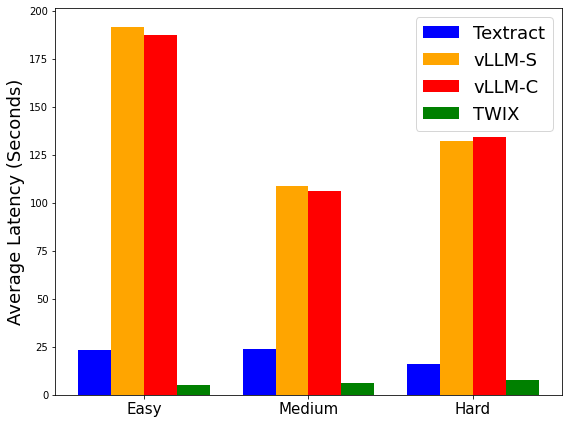

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Data for the bar plot
time = np.array([
    [23.3, 191.8, 187.5, 5.1],
    [23.6, 108.7, 106.4, 6.23],
    [15.9, 132.1, 134.4, 7.7]
])

# Categories and labels
categories = ['Easy', 'Medium', 'Hard']
bar_labels = ['Textract', 'vLLM-S', 'vLLM-C', 'TWIX']

# Create the bar plot
x = np.arange(len(categories))  # the label locations
bar_width = 0.2  # Width of each bar
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['blue', 'orange', 'red', 'green']
# Plot each group of bars
for i in range(time.shape[1]):
    ax.bar(x + i * bar_width, time[:, i], bar_width, label=bar_labels[i], color=colors[i])


# Add labels, title, and custom x-axis tick labels
ax.set_xticks(x + bar_width * (time.shape[1] - 1) / 2)
ax.set_xticklabels(categories, fontsize=18)
ax.set_ylabel('Average Latency (Seconds)',fontsize=18)
ax.legend(fontsize=18)

# Adjust font size for axes
#ax.tick_params(axis='both', which='major', labelsize=12)

# Display the plot
plt.tight_layout()
#plt.show()
plt.savefig('/Users/yiminglin/Documents/research/Pdf_reverse/pics/latency.pdf', format='pdf',bbox_inches='tight', dpi=300)


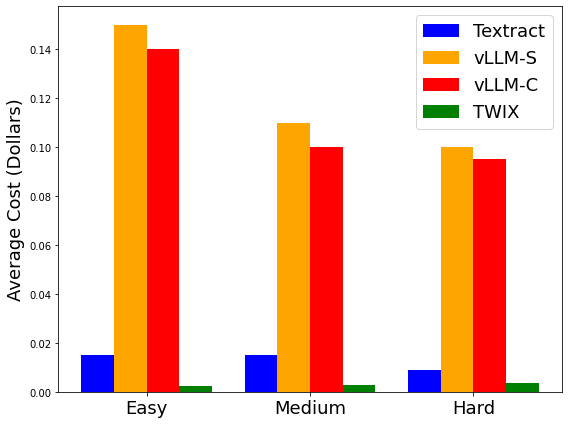

In [5]:
import matplotlib.pyplot as plt
import numpy as np


# Data for the bar plot
time = np.array([
    [0.015,0.15,0.14,0.0024],
    [0.015,0.11,0.1,0.0028],
    [0.009,0.1,0.095,0.0037]
])


# Categories and labels
categories = ['Easy', 'Medium', 'Hard']
bar_labels = ['Textract', 'vLLM-S', 'vLLM-C', 'TWIX']

# Create the bar plot
x = np.arange(len(categories))  # the label locations
bar_width = 0.2  # Width of each bar
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['blue', 'orange', 'red', 'green']
# Plot each group of bars
for i in range(time.shape[1]):
    ax.bar(x + i * bar_width, time[:, i], bar_width, label=bar_labels[i], color=colors[i])


# Add labels, title, and custom x-axis tick labels
ax.set_xticks(x + bar_width * (time.shape[1] - 1) / 2)
ax.set_xticklabels(categories,fontsize = 18)
ax.set_ylabel('Average Cost (Dollars)',fontsize=18)
ax.legend(fontsize=18)

# Adjust font size for axes
#ax.tick_params(axis='both', which='major', labelsize=12)

# Display the plot
plt.tight_layout()
#plt.show()
plt.savefig('/Users/yiminglin/Documents/research/Pdf_reverse/pics/cost.pdf', format='pdf',bbox_inches='tight', dpi=300)


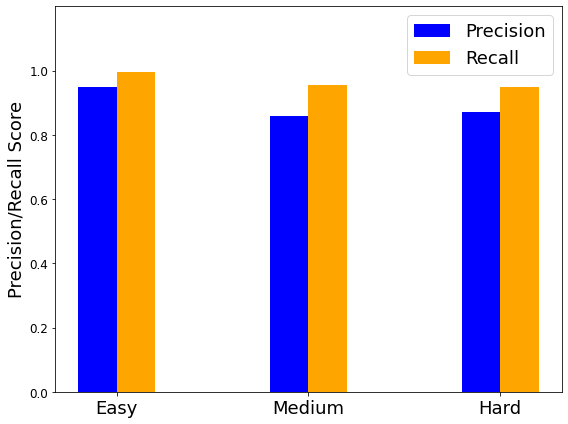

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the bar plot
time = np.array([
    [0.948, 0.995],
    [0.86, 0.956],
    [0.87, 0.949]
])

# Categories and labels
categories = ['Easy', 'Medium', 'Hard']
bar_labels = ['Precision', 'Recall']

# Create the bar plot
x = np.arange(len(categories))  # the label locations
bar_width = 0.2  # Width of each bar
fig, ax = plt.subplots(figsize=(8, 6))
plt.ylim(0, 1.2)
colors = ['blue', 'orange']

# Plot each group of bars
for i in range(time.shape[1]):
    ax.bar(x + i * bar_width, time[:, i], bar_width, label=bar_labels[i], color=colors[i])

# Add labels, title, and custom x-axis tick labels
ax.set_xticks(x + bar_width * (time.shape[1] - 1) / 2)
ax.set_xticklabels(categories, fontsize=18)
ax.set_ylabel('Precision/Recall Score', fontsize=18)
ax.legend(fontsize=18)

# Customize y-axis ticks and labels
yticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]  # Desired tick positions
ax.set_yticks(yticks)  # Set tick positions
ax.set_yticklabels([f"{tick:.1f}" for tick in yticks], fontsize=12)  # Format tick labels

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('/Users/yiminglin/Documents/research/Pdf_reverse/pics/field-prediction.pdf', 
            format='pdf', bbox_inches='tight', dpi=300)


In [ ]:
import os

def rename_files_in_folder(folder_path):
    # Ensure the folder path exists
    if not os.path.exists(folder_path):
        print("The folder path does not exist.")
        return

    # List all files in the folder
    files = os.listdir(folder_path)
    for file_name in files:
        # Get the full path of the current file
        old_file_path = os.path.join(folder_path, file_name)
        
        # Skip if it's a directory
        if os.path.isdir(old_file_path):
            continue
        
        # Get the file name and extension
        base_name, extension = os.path.splitext(file_name)
        
        # Create the new file name
        new_file_name = f"{base_name}_azure{extension}"
        
        # Full path for the new file name
        new_file_path = os.path.join(folder_path, new_file_name)
        
        # Rename the file
        os.rename(old_file_path, new_file_path)
        print(f"Renamed: {file_name} -> {new_file_name}")

# Specify the folder path
folder_path = "/Users/yiminglin/Downloads/benchmark/"  # Replace with your folder path
rename_files_in_folder(folder_path)
